# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2023

# Prova 1 - 19/10/2023

### Profa. Roseli A. F. Romero

### Monitor: Roseval Malaquias Jr.

Alunos:


1.   Lucas Yuji Matubara

# **Parte 1**

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

# Questão 1
- a) Remova os dados faltantes que aparece neste conjunto como "?" (1 pt)
- b) Reduza o número de atributos escolhendo os 3 mais relevantes. Justifique sua resposta. (1 pt)
- c) Comente a distribuição dos valores de **um** dos atributos selecionados. Escolha uma forma de visualização (ex: histograma ou boxplot) (1 pt)
- d) Calcule a obliquidade para uma das 3 variáveis mais relevantes e comente. (1 pt)

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
file_path = '/content/drive/MyDrive/breast-cancer-wisconsin.data'

In [154]:
import pandas as pd

df = pd.read_csv(file_path, na_values = '?')

In [156]:
df

,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [157]:
df = df.dropna()

In [158]:
mask_nan = df.isna().any(axis=1)
print(df[mask_nan])

Empty DataFrame
Columns: [id, clump_thickness, u_cell_size, u_cell_shape, marg_adhesion, epi_cell_size, bare_nuclei, bland_chrom, norm_nucl, mitoses, class]
Index: []


###B

In [159]:
variances = []
name = []

for col in df.columns:
    var = df[col].var()
    variances.append(var)
    name.append(col)

variances

[385199033889.422,
 7.956694417847773,
 9.39511298695165,
 8.931615307660271,
 8.205716542938477,
 4.942108946643023,
 13.27769500607549,
 6.001013297381314,
 9.318772192715421,
 3.0021596973847484,
 0.9112463128426854]

In [160]:
name

['id',
 'clump_thickness',
 'u_cell_size',
 'u_cell_shape',
 'marg_adhesion',
 'epi_cell_size',
 'bare_nuclei',
 'bland_chrom',
 'norm_nucl',
 'mitoses',
 'class']

Por exceção da coluna de id que não contém dados relevantes, notamos que as colunas de menor variancia são 0.91 'class', 3.00 'mitoses', e 4.94 'epi_cell_size'. Portanto ficaremos manteremos as de menor variancia para ter uma melhor representacao dos dados. Porem sabemos que existem tecnicas melhores para manter os dados, como o PCA por exemplo.

In [161]:
newdf = df[['class', 'mitoses', 'epi_cell_size']].copy()
newdf

,class,mitoses,epi_cell_size
0,2,1,2
1,2,1,7
2,2,1,2
3,2,1,3
4,2,1,2
...,...,...,...
694,2,1,3
695,2,1,2
696,4,2,7
697,4,1,3


###C

(array([563.,  35.,  33.,  12.,   6.,   3.,   9.,   8.,   0.,  14.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

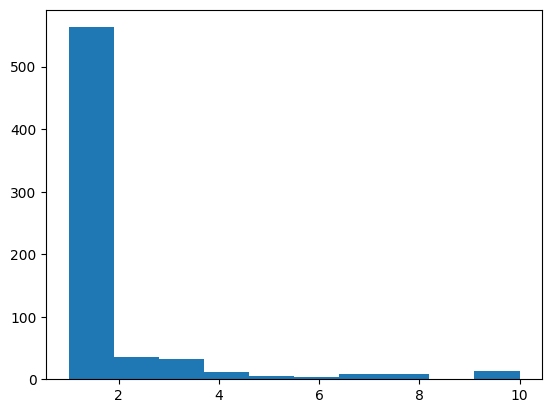

In [162]:
import matplotlib as plt
plt.pyplot.hist(newdf['mitoses'])

Notamos que o atributo de 'mitoses' indica quantas vezes uma celula passou pelo atributo de mitoses e que pelo histograma a grande maioria passou apenas uma vez, e poucas outras passaram pelo processo mais ou igual a 4 vezes.

###D

In [163]:
newdf['mitoses'].skew()

3.5114762411244103

Pelo cálculo da obliquidade de 'mitoses' notamos que seu valor e positivo e maior que 1 o que significa que a distribuição é mais alta e com menor variancia se comparada com a distribuição normal.

# Questão 2
- a) Considerando os 10 atributos originais (sem o atributo classe), reduza a dimensionalidade dos dados usando a técnica PCA, mantendo uma variância acima de 90%. (1 pt)
- b) Quantos componentes são necessários para manter a variância de 90%? (1 pt)

###A

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca.fit(df)
pca90 = pca.transform(df)
pca90[0]

array([-76695.22693618])

In [165]:
pca90 = pd.DataFrame(data=pca90, columns=['Componente 1'])
pca90

,Componente 1
0,-76695.226936
1,-73775.226945
2,-61295.226936
3,-60443.226943
4,-59697.226937
...,...
678,-300005.226936
679,-234951.226935
680,-187900.226946
681,-179249.226944


# **Parte 2**
Nos próximos exercícios utilizaremos um dataset com 13 variáveis de entrada e 1 variável de saída (num). O dataset pode ser encontrado no arquivo "clv_heart_disease.csv".
Existem valores faltantes nesse dataset, representados pelo caractere "?".

In [166]:
file_path = '/content/drive/MyDrive/clv_heart_disease.data'

In [167]:
df2 = pd.read_csv(file_path, na_values = '?')

# Questão 3

- a) Crie uma lista com o nome das variáveis numéricas e uma com o nome das variáveis categóricas
* b) **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média.

- c) **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia da moda (valor mais frequente).

In [168]:
df2.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


In [169]:
numericos = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']
categoricos = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [170]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
for col in numericos:
  df2[col] = imputer.fit_transform(df2[col].values.reshape(-1, 1))

In [171]:
imputer = SimpleImputer(strategy = 'most_frequent')
for col in categoricos:
  df2[col] = imputer.fit_transform(df2[col].values.reshape(-1, 1))

# Questão 4


Entre os atributos numericos presentes nesta base de dados, existe alguns que possuem outliers? Justifique sua resposta.

In [172]:
import numpy as np

media = np.mean(df2['age'])
desvio = np.std(df2['age'])
Q1 = np.percentile(df2['age'], 25)
Q3 = np.percentile(df2['age'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['age'] < Q1 - 1.5 * IQR) | (df2['age'] > Q3 + 1.5 * IQR)]
outliers.head(3)


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [173]:
media = np.mean(df2['trestbps'])
desvio = np.std(df2['trestbps'])
Q1 = np.percentile(df2['trestbps'], 25)
Q3 = np.percentile(df2['trestbps'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['trestbps'] < Q1 - 1.5 * IQR) | (df2['trestbps'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
14,14,52.0,male,Non-anginal pain,172.0,199.0,129.257934,Normal,162.0,no,0.5,Upsloping,0.0,Reversable defect,0
83,83,68.0,male,Non-anginal pain,180.0,274.0,125.002318,Left ventricular hypertrophy,150.0,yes,1.6,Flat,0.0,Reversable defect,1
126,126,56.0,female,Asymptomatic,200.0,288.0,138.514400,Left ventricular hypertrophy,133.0,yes,4.0,Downsloping,2.0,Reversable defect,1


In [174]:
media = np.mean(df2['chol'])
desvio = np.std(df2['chol'])
Q1 = np.percentile(df2['chol'], 25)
Q3 = np.percentile(df2['chol'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['chol'] < Q1 - 1.5 * IQR) | (df2['chol'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
48,48,65.0,female,Non-anginal pain,140.0,417.0,134.413232,Left ventricular hypertrophy,157.0,no,0.8,Upsloping,1.0,Normal,0
121,121,63.0,female,Asymptomatic,150.0,407.0,108.373922,Left ventricular hypertrophy,154.0,no,4.0,Flat,3.0,Reversable defect,1
152,152,67.0,female,Non-anginal pain,115.0,564.0,112.811891,Left ventricular hypertrophy,160.0,no,1.6,Flat,0.0,Reversable defect,0


In [175]:
media = np.mean(df2['fbs'])
desvio = np.std(df2['fbs'])
Q1 = np.percentile(df2['fbs'], 25)
Q3 = np.percentile(df2['fbs'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['fbs'] < Q1 - 1.5 * IQR) | (df2['fbs'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
9,9,53.0,male,Asymptomatic,140.0,203.0,136.266648,Left ventricular hypertrophy,155.0,yes,3.1,Downsloping,0.0,Reversable defect,1
14,14,52.0,male,Non-anginal pain,172.0,199.0,129.257934,Normal,162.0,no,0.5,Upsloping,0.0,Reversable defect,0


In [176]:
media = np.mean(df2['thalach'])
desvio = np.std(df2['thalach'])
Q1 = np.percentile(df2['thalach'], 25)
Q3 = np.percentile(df2['thalach'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['thalach'] < Q1 - 1.5 * IQR) | (df2['thalach'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
245,245,67.0,male,Asymptomatic,120.0,237.0,113.600526,Normal,71.0,no,1.0,Flat,0.0,Normal,1


In [177]:
media = np.mean(df2['oldpeak'])
desvio = np.std(df2['oldpeak'])
Q1 = np.percentile(df2['oldpeak'], 25)
Q3 = np.percentile(df2['oldpeak'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['oldpeak'] < Q1 - 1.5 * IQR) | (df2['oldpeak'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
91,91,62.0,female,Asymptomatic,160.0,164.0,113.842201,Left ventricular hypertrophy,145.0,no,6.2,Downsloping,3.0,Reversable defect,1
123,123,55.0,male,Asymptomatic,140.0,217.0,111.101124,Normal,111.0,yes,5.6,Downsloping,0.0,Reversable defect,1
183,183,59.0,male,Typical Angina,178.0,270.0,114.875078,Left ventricular hypertrophy,145.0,no,4.2,Downsloping,0.0,Reversable defect,0


In [178]:
media = np.mean(df2['ca'])
desvio = np.std(df2['ca'])
Q1 = np.percentile(df2['ca'], 25)
Q3 = np.percentile(df2['ca'], 75)
IQR = Q3 - Q1
outliers = df2[(df2['ca'] < Q1 - 1.5 * IQR) | (df2['ca'] > Q3 + 1.5 * IQR)]
outliers.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
40,40,65.0,female,Asymptomatic,150.0,225.0,106.413542,Left ventricular hypertrophy,114.0,no,1.0,Flat,3.0,Reversable defect,1
62,62,58.0,male,Asymptomatic,128.0,216.0,97.310853,Left ventricular hypertrophy,131.0,yes,2.2,Flat,3.0,Reversable defect,1


notamos que os atributos de trestbps, chol, fbs, thalach, oldpeak, e ca possuem outliers.

# Questão 5
 Considerando o atributo **chol**, responda:
- a) Qual é a media de cholestorol que esta amostra apresenta?
- b) Calcule os 4 momentos e comente os valores observados. Indique em qual faixa de valores a maioria de pessoas desta amostra está  incluída.

###A

In [179]:
df2['chol'].mean()

246.69306930693068

###B

In [181]:
df2['chol'].mean()


246.69306930693068

In [182]:
df2['chol'].var()


2680.849190217035

In [184]:
df2['chol'].skew()


1.1355031533363453

In [183]:
df2['chol'].kurtosis()

4.491724286538853